In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# 根据相关性删除/改变部分变量后的merge   

In [147]:
bank_train = pd.read_csv('bank_train2.csv',index_col=0)
bill_train=pd.read_csv('bill_train2.csv' ,index_col=0)   #账单记录表
browse_train_onehot=pd.read_csv('browse_train_onehot.csv',index_col=0) #浏览信息表onehot
browse_train=pd.read_csv('browse_train2.csv',index_col=0) #浏览信息表
loan_train=pd.read_csv('df_loan_train.csv',index_col=0) #放款时间表
overdue_train=pd.read_csv('df_overdue_train.csv' ,index_col=0) #逾期记录表
user_train=pd.read_csv('user_train.csv',index_col=0)  #用户信息表
user_train_onehot=pd.read_csv('user_train_onehot.csv',index_col=0)  #用户信息表onehot

In [148]:
train=pd.merge(user_train_onehot,bank_train,how='inner',on='user_id')
train=pd.merge(train,bill_train,how='inner',on='user_id')
train=pd.merge(train,browse_train_onehot,how='inner',on='user_id')
train=pd.merge(train,loan_train,how='inner',on='user_id')
train=pd.merge(train,overdue_train,how='inner',on='user_id')

In [149]:
train=train.drop(['loantime','time','saving_avg','brows_num before lending_count','brows_num before lending_count（unique）'],axis=1)
train=train.drop(['sex_2','job_4','education_4','marriage_5','residence_4'],axis=1)

In [150]:
train.head()

,user_id,sex_0,sex_1,job_0,job_1,job_2,job_3,education_0,education_1,education_2,...,brows_num before lending_3,brows_num before lending_4,brows_num before lending_5,brows_num before lending_6,brows_num before lending_7,brows_num before lending_8,brows_num before lending_9,brows_num before lending_10,brows_num before lending_11,overdue
0,1265,0,1,0,0,0,1,0,0,0,...,0.0,60.0,60.0,30.0,40.0,0.0,0.0,60.0,0.0,0
1,2583,0,0,0,0,1,0,0,0,1,...,0.0,117.0,90.0,45.0,54.0,27.0,0.0,45.0,0.0,0
2,29165,0,1,0,0,1,0,0,0,0,...,0.0,72.0,0.0,36.0,54.0,0.0,0.0,36.0,0.0,0
3,2443,0,1,0,0,0,0,0,0,0,...,33.0,66.0,110.0,66.0,55.0,22.0,0.0,22.0,0.0,0
4,590,0,1,0,0,1,0,0,0,0,...,0.0,12.0,0.0,6.0,6.0,0.0,0.0,6.0,0.0,1


In [193]:
# 标准化数据集 X
from sklearn import preprocessing
train_sub=train.iloc[:,20:-1]

In [200]:
names=list(train_sub)
names

['earning_avg',
 'income_avg',
 'un_income_avg',
 'last_bill_amount_sum',
 'last_repay_amount_sum',
 'credit_amount_sum',
 'cur_bill_bal_sum',
 'cur_bill_minrepay_sum',
 'cons_num_sum',
 'cur_bill_amount_sum',
 'adjust_amount_sum',
 'cyclic_accr_sum',
 'avail_bal_sum',
 'borrow_cash_sum',
 'repay_status_sum',
 'repay_status_count',
 'last_bill_amount_max',
 'last_repay_amount_max',
 'credit_amount_max',
 'cur_bill_bal_max',
 'cur_bill_minrepay_max',
 'cons_num_max',
 'cur_bill_amount_max',
 'adjust_amount_max',
 'cyclic_accr_max',
 'avail_bal_max',
 'borrow_cash_max',
 'repay_status_max',
 'last_bill_amount_min',
 'last_repay_amount_min',
 'credit_amount_min',
 'cur_bill_bal_min',
 'cur_bill_minrepay_min',
 'cons_num_min',
 'cur_bill_amount_min',
 'adjust_amount_min',
 'cyclic_accr_min',
 'avail_bal_min',
 'borrow_cash_min',
 'repay_status_min',
 'last_bill_amount_mean',
 'last_repay_amount_mean',
 'credit_amount_mean',
 'cur_bill_bal_mean',
 'cur_bill_minrepay_mean',
 'cons_num_mean',

In [195]:
train_subscaled = preprocessing.scale(train_sub)
train_subscaled=pd.DataFrame(train_subscaled,columns=names)

d:\python3.6\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [196]:
train_subscaled.isnull().sum()

earning_avg                                           0
income_avg                                            0
un_income_avg                                         0
last_bill_amount_sum                                  0
last_repay_amount_sum                                 0
credit_amount_sum                                     0
cur_bill_bal_sum                                      0
cur_bill_minrepay_sum                                 0
cons_num_sum                                          0
cur_bill_amount_sum                                   0
adjust_amount_sum                                     0
cyclic_accr_sum                                       0
avail_bal_sum                                         0
borrow_cash_sum                                       0
repay_status_sum                                      0
repay_status_count                                    0
last_bill_amount_max                                  0
last_repay_amount_max                           

In [203]:
train_scaled=train.iloc[:,:20].join(train_subscaled,how='inner')
train_scaled=train_scaled.join(train.iloc[:,-1],how='inner')

In [204]:
train_scaled.head()

,user_id,sex_0,sex_1,job_0,job_1,job_2,job_3,education_0,education_1,education_2,...,brows_num before lending_3,brows_num before lending_4,brows_num before lending_5,brows_num before lending_6,brows_num before lending_7,brows_num before lending_8,brows_num before lending_9,brows_num before lending_10,brows_num before lending_11,overdue
0,1265,0,1,0,0,0,1,0,0,0,...,-0.256697,-0.245729,0.006296,-0.293652,-0.270100,-0.375523,-0.105924,0.207819,-0.040746,0
1,2583,0,0,0,0,1,0,0,0,1,...,-0.256697,0.107256,0.227392,-0.098178,-0.128606,0.049666,-0.105924,-0.000830,-0.040746,0
2,29165,0,1,0,0,1,0,0,0,0,...,-0.256697,-0.171416,-0.435897,-0.215463,-0.128606,-0.375523,-0.105924,-0.126019,-0.040746,0
3,2443,0,1,0,0,0,0,0,0,0,...,1.047291,-0.208573,0.374790,0.175487,-0.118499,-0.029073,-0.105924,-0.320757,-0.040746,0
4,590,0,1,0,0,1,0,0,0,0,...,-0.256697,-0.542980,-0.435897,-0.606412,-0.613727,-0.375523,-0.105924,-0.543315,-0.040746,1


In [205]:
train_scaled.to_csv('train_scaled.csv')

# PCA

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [13]:
train_128=pd.read_csv('train_128.csv',index_col=0)
train_scaled=pd.read_csv('train_scaled.csv',index_col=0)
train_scaled.head()

,user_id,sex_0,sex_1,job_0,job_1,job_2,job_3,education_0,education_1,education_2,...,brows_num before lending_3,brows_num before lending_4,brows_num before lending_5,brows_num before lending_6,brows_num before lending_7,brows_num before lending_8,brows_num before lending_9,brows_num before lending_10,brows_num before lending_11,overdue
0,1265,0,1,0,0,0,1,0,0,0,...,-0.256697,-0.245729,0.006296,-0.293652,-0.270100,-0.375523,-0.105924,0.207819,-0.040746,0
1,2583,0,0,0,0,1,0,0,0,1,...,-0.256697,0.107256,0.227392,-0.098178,-0.128606,0.049666,-0.105924,-0.000830,-0.040746,0
2,29165,0,1,0,0,1,0,0,0,0,...,-0.256697,-0.171416,-0.435897,-0.215463,-0.128606,-0.375523,-0.105924,-0.126019,-0.040746,0
3,2443,0,1,0,0,0,0,0,0,0,...,1.047291,-0.208573,0.374790,0.175487,-0.118499,-0.029073,-0.105924,-0.320757,-0.040746,0
4,590,0,1,0,0,1,0,0,0,0,...,-0.256697,-0.542980,-0.435897,-0.606412,-0.613727,-0.375523,-0.105924,-0.543315,-0.040746,1


In [14]:
x = train_scaled.drop(['user_id','overdue'],axis=1)
x = np.array(x)
y = train_scaled[['overdue']]
y = np.array(y)

In [21]:
pca = PCA(0.99).fit(x)
pca.n_components_

76

Text(0, 0.5, 'cumulative explained variance')

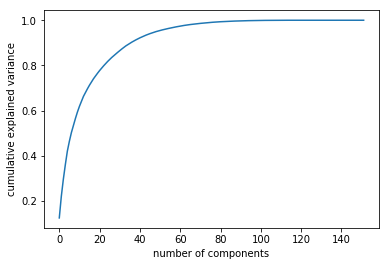

In [23]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=76)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=76, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
newX=pca.fit_transform(x)
newX.shape

(5298, 76)

In [27]:
newx= pd.DataFrame(newX)

In [31]:
newx.to_csv('newx.csv')